In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\train.csv')
test_df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\test.csv')

In [7]:
train_df.shape

(4922, 21)

In [8]:
test_df.shape

(2110, 21)

In [9]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5154-VEKBL,Female,No,No,No,9,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85,Yes
1,9052-DHNKM,Male,No,No,No,26,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Electronic check,61.55,1581.95,No
2,2988-PLAHS,Female,No,No,No,3,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45,No
3,1196-AMORA,Male,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,73.60,520.00,Yes
4,6695-FRVEC,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.70,No


In [10]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6614-YWYSC,Male,Yes,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
1,9546-KDTRB,Female,No,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
2,0871-URUWO,Male,No,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3,5151-HQRDG,Male,No,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4,6624-JDRDS,Female,No,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [17]:
train_df.drop('customerID', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

In [13]:
test_df.drop('customerID', axis=1, inplace=True)

In [14]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,Yes,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
1,Female,No,No,No,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
2,Male,No,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3,Male,No,Yes,No,37,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4,Female,No,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No


In [18]:
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
test_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
num_cols = ['MonthlyCharges', 'TotalCharges']
            
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
            
num_pipeline = Pipeline(steps = [('scaler', Normalizer())])
            
cat_pipeline = Pipeline(steps = [('encoder', OneHotEncoder())])

In [21]:
df = pd.read_csv(r'F:\Data Science\Customer-Churn-Project\artifacts\data_cleaned.csv')

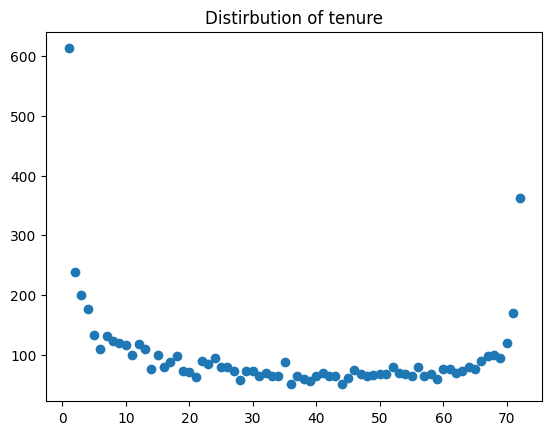

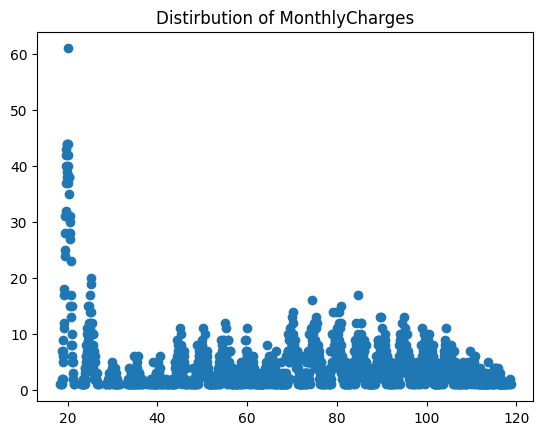

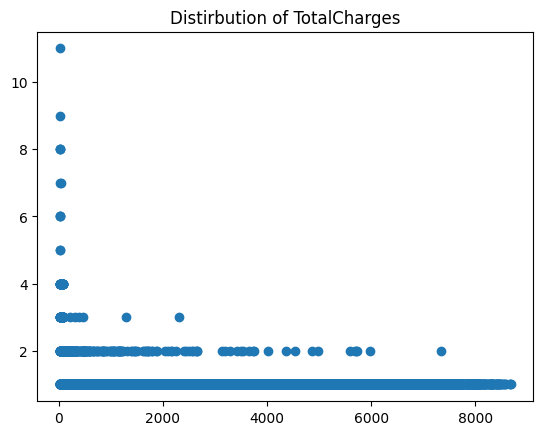

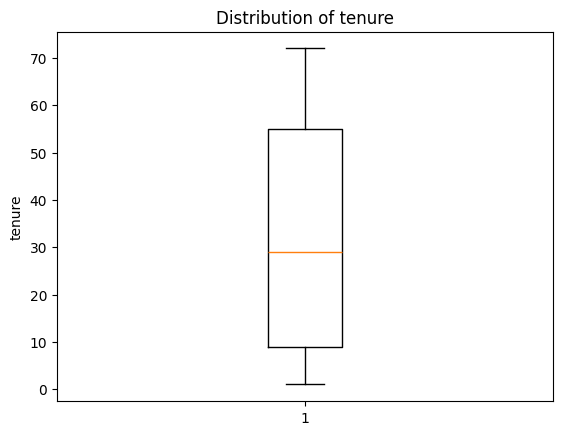

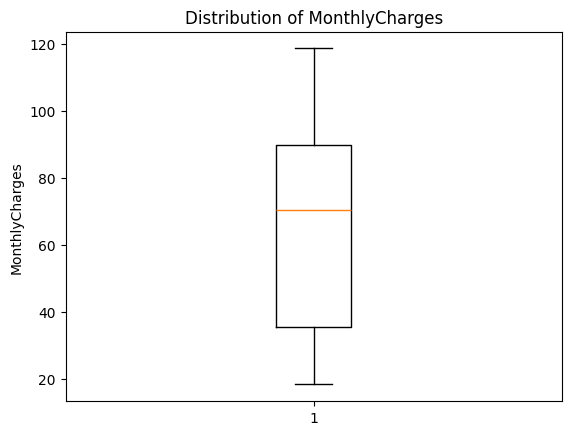

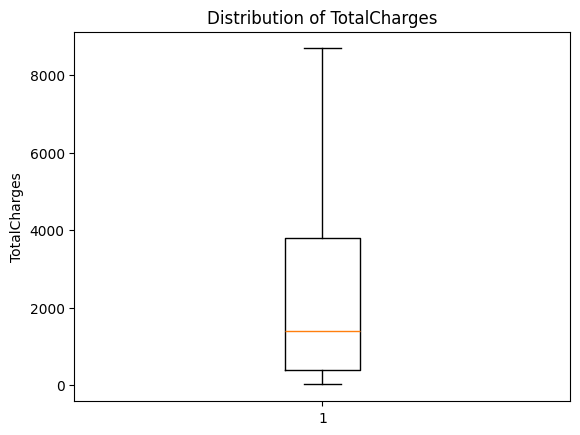

In [24]:
# handling outliers 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# visualizing to determine the presence of outliers 
# scatter plot
for col in num_cols:
    plt.scatter(df[col].value_counts().index, df[col].value_counts())
    plt.title("Distirbution of " + col)
    plt.show()

# box plot
for col in num_cols:
    plt.boxplot(df[col])
    plt.title("Distribution of " + col)
    plt.ylabel(col)
    plt.show()



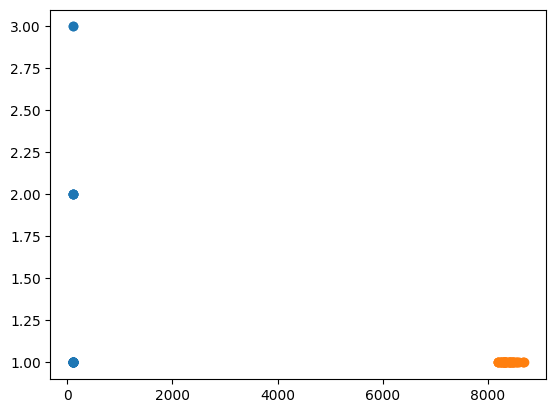

In [43]:
def detect_outliers(df, num_cols, threshold=2.6):
    outliers = pd.DataFrame()
    for col in num_cols:
        mean = np.mean(df[col])
        std = np.std(df[col])
        z_scores = (df[col] - mean) / std
        outlier_values = df[np.abs(z_scores) > threshold]
        outliers = pd.concat([outliers, outlier_values])
    return outliers 
    
outliers_df = detect_outliers(df, num_cols)

# visualizing outliers 
plt.scatter(outliers_df['MonthlyCharges'].value_counts().index, outliers_df['MonthlyCharges'].value_counts())
plt.scatter(outliers_df['TotalCharges'].value_counts().index, outliers_df['TotalCharges'].value_counts())


In [45]:
outliers_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
437,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20,No
464,Male,Yes,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8404.90,No
525,Male,Yes,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.15,No
539,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.50,No
550,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.60,8220.40,No
607,Male,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.55,8306.05,No
745,Male,Yes,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,8196.40,No
848,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.80,8476.50,No
894,Male,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.10,8310.55,No
1131,Female,Yes,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.65,8333.95,No


In [46]:
outliers_df.shape

(48, 20)

In [47]:
outliers_df.to_csv("F:\Data Science\Rough\outliers.csv")

In [ ]:

# removing outliers 
df_cleaned = df_encoded.drop(outliers_df.index)

print("Size before removing outliers: ",df_encoded.shape[0])
print("Size after removing outliers: ",df_cleaned.shape[0])


In [54]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from dataclasses import dataclass


In [91]:
train_df = pd.read_csv(r'F:\\Data Science\\Customer-Churn-Project\\artifacts\\train.csv')
test_df = pd.read_csv(r'F:\\Data Science\\Customer-Churn-Project\\artifacts\\test.csv')

In [10]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,13 - 24,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.65,1493.20,0
1,Female,No,No,No,1 - 12,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,1
2,Female,No,Yes,No,13 - 24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.60,1
3,Female,No,Yes,No,61 - 72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,One year,No,Electronic check,89.00,5898.60,0
4,Female,No,No,No,25 - 36,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,60.55,1982.60,0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4888 non-null   object 
 1   SeniorCitizen     4888 non-null   object 
 2   Partner           4888 non-null   object 
 3   Dependents        4888 non-null   object 
 4   tenure            4888 non-null   object 
 5   PhoneService      4888 non-null   object 
 6   MultipleLines     4888 non-null   object 
 7   InternetService   4888 non-null   object 
 8   OnlineSecurity    4888 non-null   object 
 9   OnlineBackup      4888 non-null   object 
 10  DeviceProtection  4888 non-null   object 
 11  TechSupport       4888 non-null   object 
 12  StreamingTV       4888 non-null   object 
 13  StreamingMovies   4888 non-null   object 
 14  Contract          4888 non-null   object 
 15  PaperlessBilling  4888 non-null   object 
 16  PaymentMethod     4888 non-null   object 


In [35]:
#import sys
#import os
#from src.exception_handling import CustomException
#from src.logger import logging
#from src.utils import save_object

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, Normalizer, 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from dataclasses import dataclass



# Data transformation configuration class
@dataclass
class DataTransformationConfig:
    
    # path for preprocessor object 
    preprocessor_obj_file_path = os.path.join('artifacts', "preprocessor.pkl")
    

# Data transformation class     
class DataTransformation:
    """
    Import the cleaned data 
    Performs train, test split & Saves it in artifacts folder 
    Preprocess the train, test sets and returns them as an array 
    """ 
    
    # Initiate the configuration object
    def __init__(self):
        self.data_transformation_config = DataTransformationConfig()
    

    def get_data_transformer_object(self):
        
        """
        Building preprocessor object and returning it
        """
        try:
            num_cols = ['MonthlyCharges', 'TotalCharges']
            
            cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
            
            num_pipeline = Pipeline(steps = [('scaler', Normalizer() )])
            
            cat_pipeline = Pipeline(steps = [('encoder', OneHotEncoder() )])
            
            #logging.info(f"Numerical columns: {num_cols}")
            #logging.info(f"Categorical columns: {cat_cols}")
            
            preprocessor = ColumnTransformer([('num_pipeline', num_pipeline, num_cols),
                                              ('cat_pipeline', cat_pipeline, cat_cols)])
            
            return preprocessor
        
        except Exception as e:
            raise CustomException(e, sys)
            
            
    def initiate_data_transformation(self, train_path, test_path):
        
        """
        Function to initiate the data transformation
        """ 
        
        try: 
            
            #logging.info("Data transformation process has been started.")
            train_df = pd.read_csv(train_path)
            test_df = pd.read_csv(test_path)
            #logging.info("Imported train and test data.")
            
            
            
            #logging.info("Obtaining preprocessing object.")
            # calling the preprocessor from get_data_transformer_object 
            preprocessing_obj = self.get_data_transformer_object()
            
            
            target_column_name = 'Churn'
            num_cols = ['MonthlyCharges', 'TotalCharges']
            
            
            
            # train set
            X_train = train_df.drop(columns=target_column_name, axis=1)
            y_train = train_df[target_column_name]
            
            # test set
            X_test = test_df.drop(columns=target_column_name, axis=1)
            y_test = test_df[target_column_name]
            
    
            
            #logging.info("Preprocessing train and test sets has been started.")
            X_train_arr = preprocessing_obj.fit_transform(X_train)
            X_test_arr = preprocessing_obj.transform(X_test)
            
            
            
            # handling imbalance 
           #logging.info("Handling imbalance.")
            smote_enn = SMOTEENN(random_state=42)
            kmeans_smote = KMeansSMOTE(sampling_strategy='minority', random_state=42)
            X_train_resampled, y_train_resampled = kmeans_smote.fit_resample(X_train_arr, y_train)
            
            
            #X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
            #y_train_df = pd.DataFrame(y_train_resampled, columns=y_train.columns)
            
            
            #logging.info(f"Shape of X_train before SMOTEENN:{X_train_arr.shape}")
            #logging.info(f"Shape of X_train after SMOTEENN: {X_train_resampled.shape}")
            #logging.info(f"Shape of y_train before SMOTEEN: {y_train.shape}")
            #logging.info(f"Shape of y_train after SMOTEENN: {y_train_resampled.shape}")
            
            #logging.info(f"Distribution of Churn before SMOTEENN: {y_train.value_counts()}")
            #logging.info(f"Distribution of Churn after SMOTEENN: {y_train_resampled.value_counts()}")
            
            #logging.info("Imbalance has been handled.")


        
            # concatenate the transformed train & test_arr to a single numpy array 
            # np.c_ function to concatenate column wise                                                                               
            train_arr = np.c_[X_train_resampled, y_train_resampled]
            test_arr = np.c_[X_test_arr, np.array(y_test)]
            
            
            
            # saving the preprocessing object 
            save_object(file_path = self.data_transformation_config.preprocessor_obj_file_path,
                        obj = preprocessing_obj)
            
            

            #logging.info("Preprocessing object has been saved.")
            #logging.info("Data transformation process has been completed.")
            
            return(train_arr, 
                   test_arr,
                   self.data_transformation_config.preprocessor_obj_file_path)
        
            
        except Exception as e:
            raise CustomException(e,sys)


NameError: name 'os' is not defined

In [41]:
y_train_ser = pd.Series(y_train)

In [44]:
y_train_ser.value_counts()

0.0    3557
1.0    3557
Name: count, dtype: int64

In [45]:
y_test_ser = pd.Series(y_test)
y_test_ser.value_counts()

0.0    1559
1.0     537
Name: count, dtype: int64

In [51]:
y_train_ser1 = pd.Series(y_train)
y_test_ser1 = pd.Series(y_test)

In [52]:
y_train_ser1.value_counts()

0.0    3557
1.0    3557
Name: count, dtype: int64

In [53]:
y_test_ser1.value_counts()

0.0    1559
1.0     537
Name: count, dtype: int64

In [24]:
import sys
#from src.logger import logging



def error_message_detail(error, error_detail:sys):           # sys module to extract error details 
    """custom exception handling 

    Args:
        error (_type_): _description_
        error_detail (sys): _description_
    """                                     
                                             
    _, _, exc_tb = error_detail.exc_info()           # returns a tuple of 3 values(type, value, traceback) we are discarding the first two using _, _, 
                                                     # exc_tb - exception trace back object  
    
    file_name = exc_tb.tb_frame.f_code.co_filename   # tb_frame - Frames information of trace back object 'exc_tb' i.e code execution, local variables
                                                     # f_code - code information of Frame object 'tb_frame' i.e line number, byte code
                                                     # co_filename - File name information of code object 'f_code' 
                                                     
    error_message = "Error occured in python script [{0}] line number [{1}] error message [{2}]".format(
                                                   file_name, exc_tb.tb_lineno, str(error)  )
    
    return error_message 
    
    
    
class CustomException(Exception):                   # CustomException inherits from the built-in 'Exception' class.
    def __init__(self, error_message, error_detail:sys):
        super().__init__(error_message)             # initializing the base Exception with error_message 
                                                    # inheritance   
        
        self.error_message = error_message_detail(error_message, error_detail=error_detail)       # create and store the detailed error message
    
    def __str__(self):                    # '__str__' - representation method - string 
        return self.error_message
    


In [26]:
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    """
    Evaluates a model using gridsearchcv
    Returns: report containing model names and its train, test accuracy
    """
    
    try:
        
        report = {} 
        #logging.info("Starting model evaluation process.")
        
        for model_name, model in models.items():
            param = params[model_name]
            
            gs = GridSearchCV(model, param, cv=8)
            #logging.info(f"Starting gridsearch for {model_name}")
            gs.fit(X_train, y_train)
            
            model.set_params(**gs.best_params_)
            model.fit(X_train, y_train)
            
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            train_model_score = accuracy_score(y_train, y_train_pred)
            test_model_score = accuracy_score(y_test, y_test_pred)
            
            #logging.info(f"Train and test accuracy score for {model_name}: {train_model_score, test_model_score}")
            logging.info(f"Completed gridsearch for {model_name}")
            
            report[model_name] = {'train_accuracy': train_model_score, 
                                  'test_accuracy': test_model_score }
            
        #logging.info("Model evalutation process has beeen completed.")
        return report
    
    
    except Exception as e:
        raise CustomException(e, sys)

Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.8503, Test Accuracy: 0.8001
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1559
         1.0       0.60      0.66      0.63       537

    accuracy                           0.80      2096
   macro avg       0.74      0.75      0.75      2096
weighted avg       0.81      0.80      0.80      2096




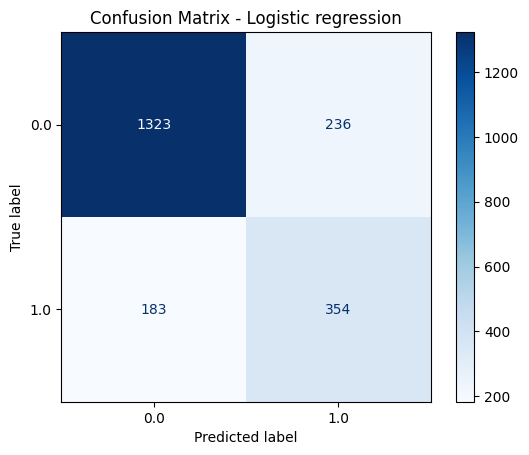

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.8246, Test Accuracy: 0.7619
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1559
         1.0       0.53      0.72      0.61       537

    accuracy                           0.76      2096
   macro avg       0.71      0.75      0.72      2096
weighted avg       0.80      0.76      0.77      2096




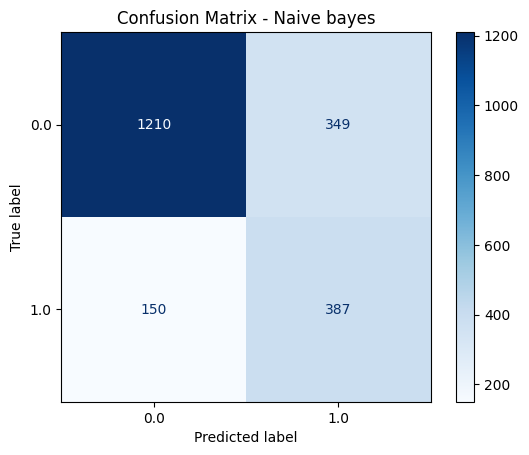

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 0.8662, Test Accuracy: 0.7719
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1559
         1.0       0.55      0.66      0.60       537

    accuracy                           0.77      2096
   macro avg       0.71      0.74      0.72      2096
weighted avg       0.79      0.77      0.78      2096




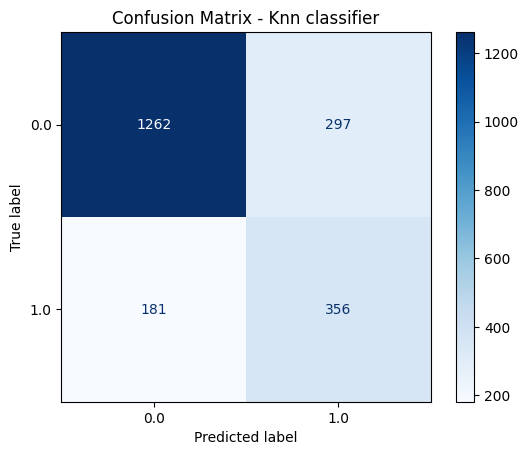

Evaluating Decision tree...
Decision tree - Train Accuracy: 0.8396, Test Accuracy: 0.7915
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1559
         1.0       0.59      0.62      0.60       537

    accuracy                           0.79      2096
   macro avg       0.73      0.74      0.73      2096
weighted avg       0.80      0.79      0.79      2096




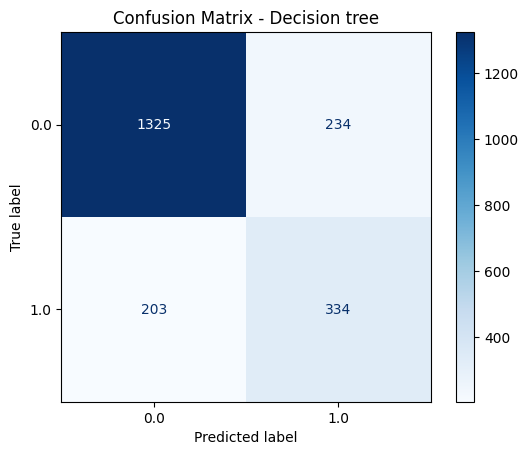

Evaluating Random forest...
Random forest - Train Accuracy: 0.8970, Test Accuracy: 0.8068
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1559
         1.0       0.64      0.57      0.60       537

    accuracy                           0.81      2096
   macro avg       0.75      0.73      0.74      2096
weighted avg       0.80      0.81      0.80      2096




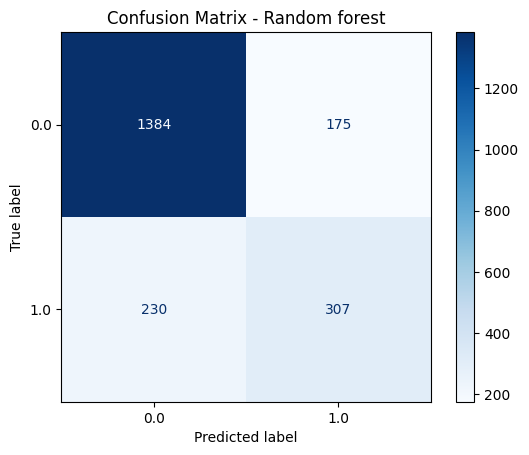

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost classifier - Train Accuracy: 0.8559, Test Accuracy: 0.7977
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1559
         1.0       0.59      0.67      0.63       537

    accuracy                           0.80      2096
   macro avg       0.74      0.76      0.75      2096
weighted avg       0.81      0.80      0.80      2096




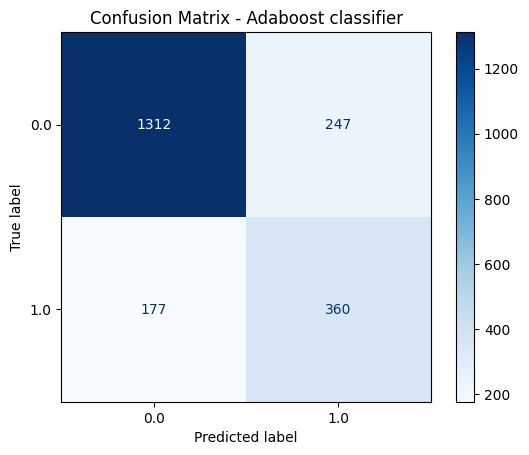

Evaluating Xgboost classifier...
Xgboost classifier - Train Accuracy: 0.8629, Test Accuracy: 0.8058
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1559
         1.0       0.63      0.60      0.61       537

    accuracy                           0.81      2096
   macro avg       0.75      0.74      0.74      2096
weighted avg       0.80      0.81      0.80      2096




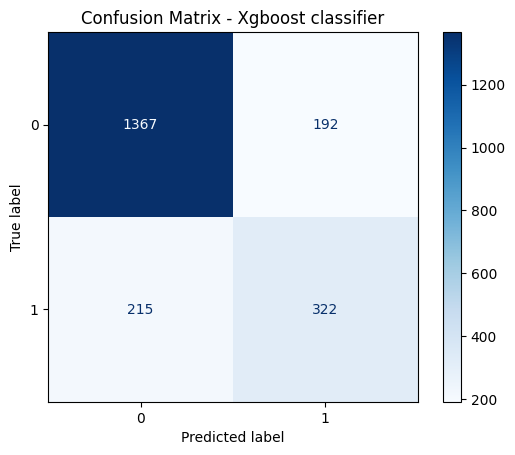

Evaluating Support vector classifier...
Support vector classifier - Train Accuracy: 0.8475, Test Accuracy: 0.7910
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1559
         1.0       0.60      0.54      0.57       537

    accuracy                           0.79      2096
   macro avg       0.72      0.71      0.72      2096
weighted avg       0.78      0.79      0.79      2096




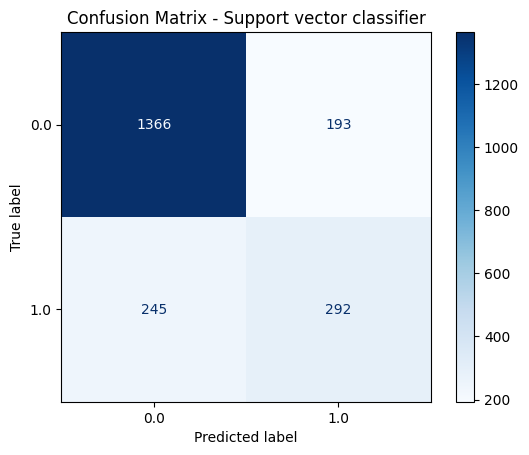


Best Model: Random forest
Final accuracy: 0.8068
Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1559
         1.0       0.64      0.57      0.60       537

    accuracy                           0.81      2096
   macro avg       0.75      0.73      0.74      2096
weighted avg       0.80      0.81      0.80      2096



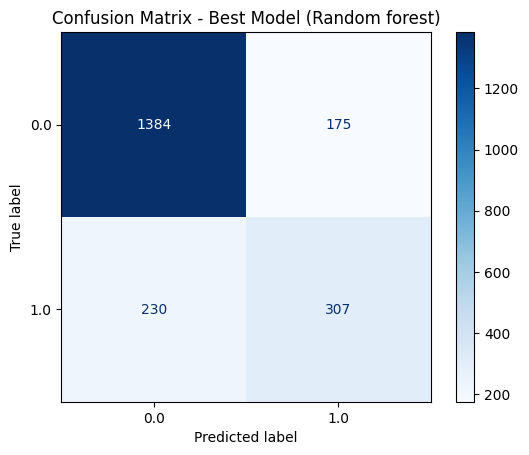

In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Support vector classifier": SVC()
}

params = {
    "Logistic regression": [
        {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    ],
    "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07]},
    "Knn classifier": {
        'n_neighbors': [5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto']
    },
    "Decision tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': [None, 'sqrt']
    },
    "Random forest": {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': [None, 'sqrt'],
        'class_weight': ['balanced']
    },
    "Adaboost classifier": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "Xgboost classifier": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    "Support vector classifier": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    }
}

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train, y_train=y_train_ser,
                               X_test=X_test, y_test=y_test_ser,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.8427, Test Accuracy: 0.7953
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1559
         1.0       0.59      0.68      0.63       537

    accuracy                           0.80      2096
   macro avg       0.74      0.76      0.74      2096
weighted avg       0.81      0.80      0.80      2096




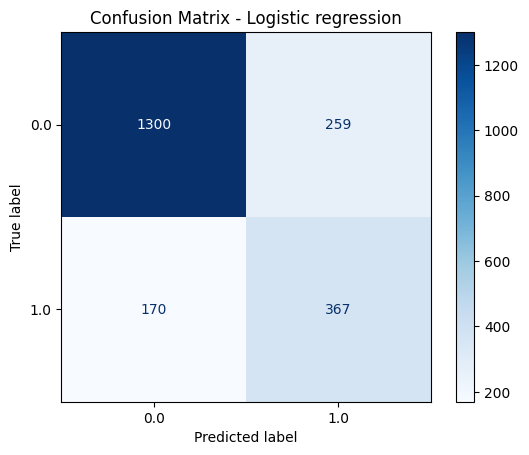

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.8126, Test Accuracy: 0.7467
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1559
         1.0       0.50      0.81      0.62       537

    accuracy                           0.75      2096
   macro avg       0.71      0.77      0.72      2096
weighted avg       0.81      0.75      0.76      2096




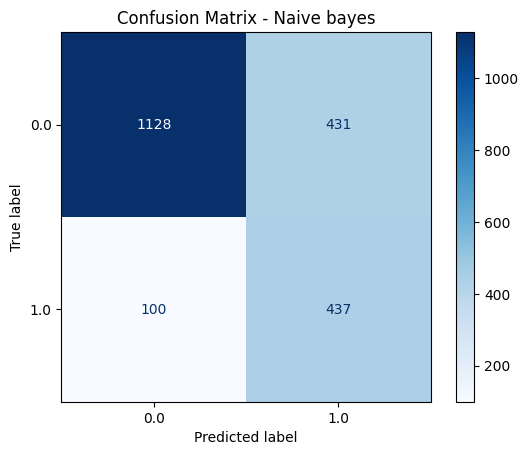

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 0.8537, Test Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1559
         1.0       0.53      0.73      0.62       537

    accuracy                           0.77      2096
   macro avg       0.71      0.75      0.72      2096
weighted avg       0.80      0.77      0.78      2096




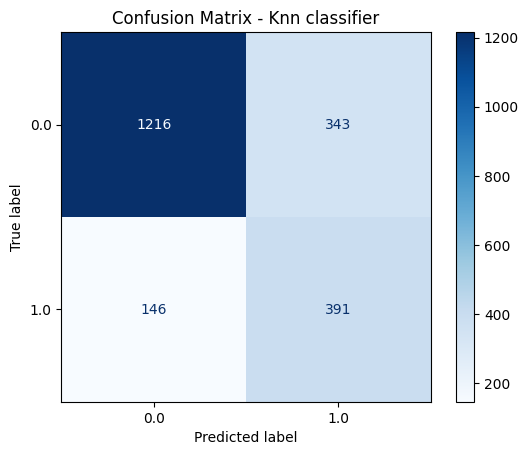

Evaluating Decision tree...
Decision tree - Train Accuracy: 0.8729, Test Accuracy: 0.7796
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1559
         1.0       0.56      0.62      0.59       537

    accuracy                           0.78      2096
   macro avg       0.71      0.73      0.72      2096
weighted avg       0.79      0.78      0.78      2096




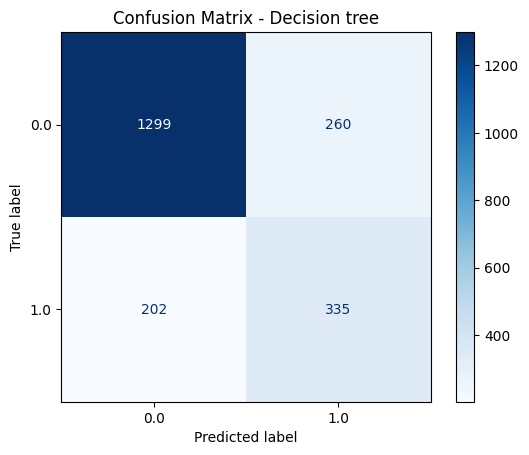

Evaluating Random forest...
Random forest - Train Accuracy: 0.8980, Test Accuracy: 0.8006
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1559
         1.0       0.61      0.59      0.60       537

    accuracy                           0.80      2096
   macro avg       0.74      0.73      0.74      2096
weighted avg       0.80      0.80      0.80      2096




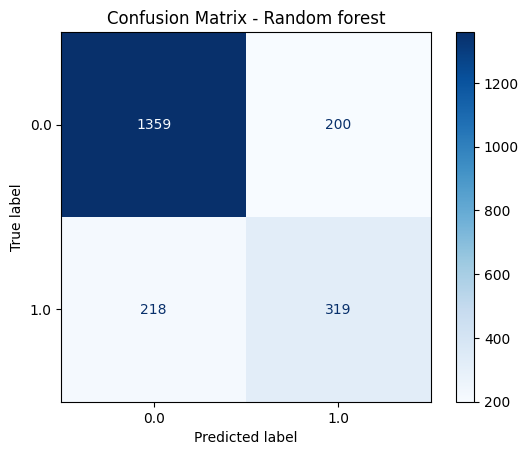

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost classifier - Train Accuracy: 0.8537, Test Accuracy: 0.7906
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1559
         1.0       0.58      0.67      0.62       537

    accuracy                           0.79      2096
   macro avg       0.73      0.75      0.74      2096
weighted avg       0.80      0.79      0.80      2096




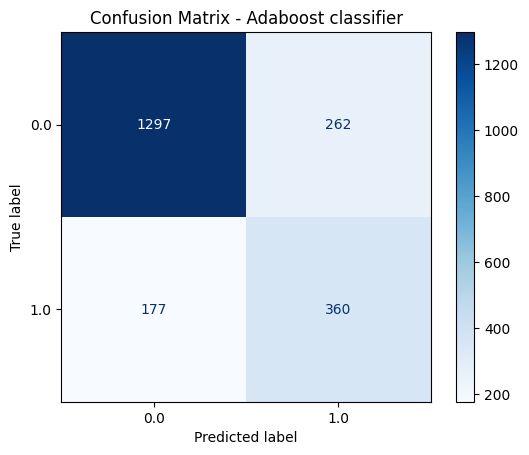

Evaluating Xgboost classifier...
Xgboost classifier - Train Accuracy: 0.8738, Test Accuracy: 0.8077
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1559
         1.0       0.62      0.63      0.63       537

    accuracy                           0.81      2096
   macro avg       0.75      0.75      0.75      2096
weighted avg       0.81      0.81      0.81      2096




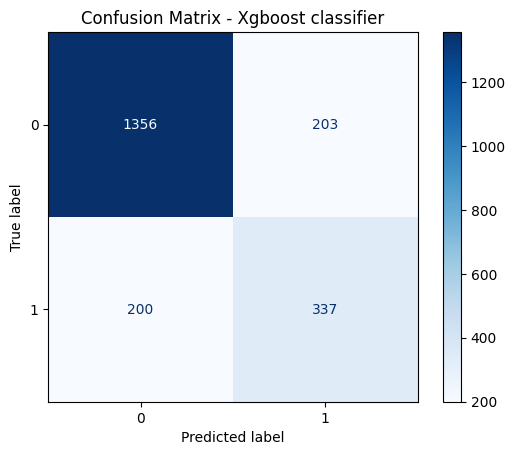

Evaluating Support vector classifier...
Support vector classifier - Train Accuracy: 0.8683, Test Accuracy: 0.7958
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1559
         1.0       0.60      0.59      0.60       537

    accuracy                           0.80      2096
   macro avg       0.73      0.73      0.73      2096
weighted avg       0.79      0.80      0.80      2096




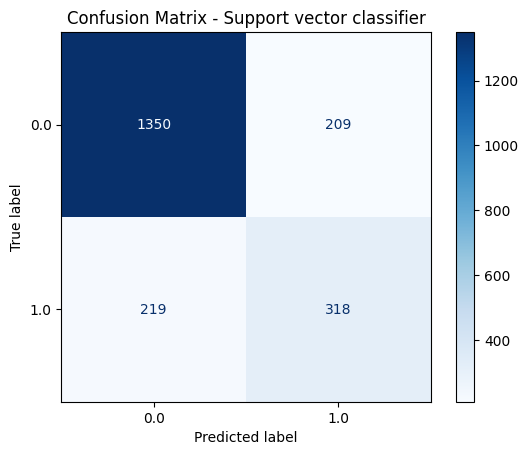


Best Model: Xgboost classifier
Final accuracy: 0.8077
Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1559
         1.0       0.62      0.63      0.63       537

    accuracy                           0.81      2096
   macro avg       0.75      0.75      0.75      2096
weighted avg       0.81      0.81      0.81      2096



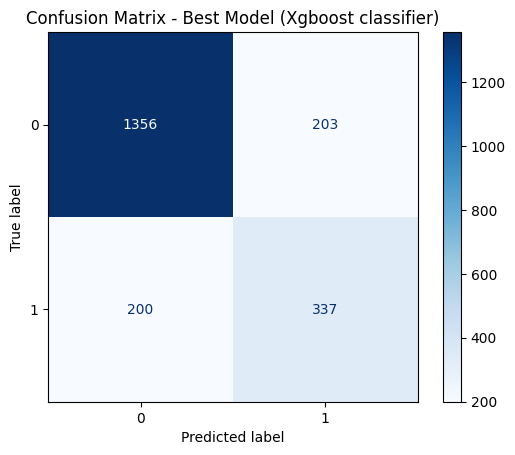

In [58]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Support vector classifier": SVC()
}

params = {
    "Logistic regression": [
        {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    ],
    "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07]},
    "Knn classifier": {
        'n_neighbors': [5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto']
    },
    "Decision tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': [None, 'sqrt']
    },
    "Random forest": {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': [None, 'sqrt'],
        'class_weight': ['balanced']
    },
    "Adaboost classifier": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "Xgboost classifier": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    },
    "Support vector classifier": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    }
}

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train, y_train=y_train,
                               X_test=X_test, y_test=y_test,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.8430, Test Accuracy: 0.7906
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1559
         1.0       0.57      0.70      0.63       537

    accuracy                           0.79      2096
   macro avg       0.73      0.76      0.74      2096
weighted avg       0.81      0.79      0.80      2096




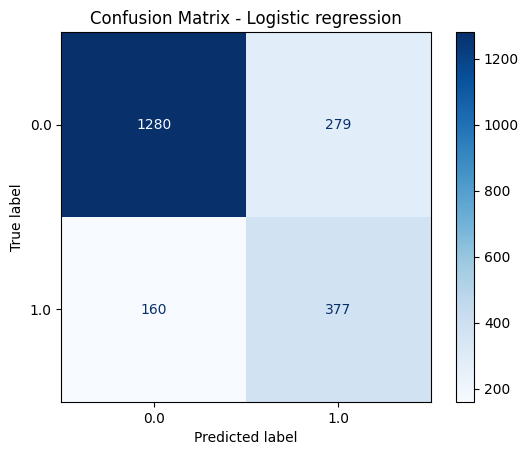

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.8126, Test Accuracy: 0.7467
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1559
         1.0       0.50      0.81      0.62       537

    accuracy                           0.75      2096
   macro avg       0.71      0.77      0.72      2096
weighted avg       0.81      0.75      0.76      2096




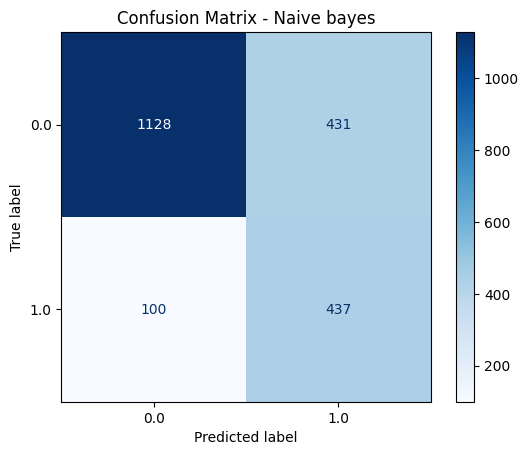

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 0.8284, Test Accuracy: 0.7686
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1559
         1.0       0.54      0.73      0.62       537

    accuracy                           0.77      2096
   macro avg       0.71      0.76      0.73      2096
weighted avg       0.80      0.77      0.78      2096




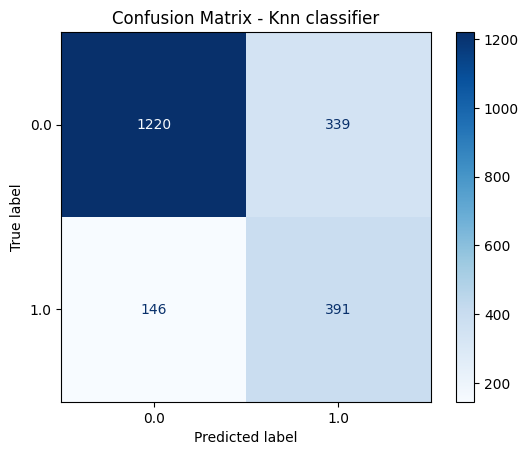

Evaluating Decision tree...
Decision tree - Train Accuracy: 0.8226, Test Accuracy: 0.7762
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1559
         1.0       0.57      0.53      0.55       537

    accuracy                           0.78      2096
   macro avg       0.70      0.69      0.70      2096
weighted avg       0.77      0.78      0.77      2096




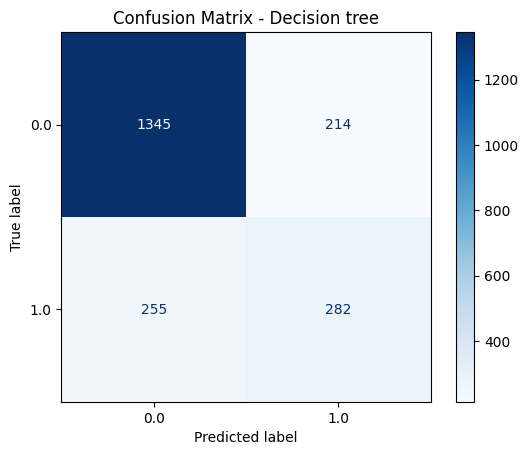

Evaluating Random forest...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
285 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Random forest - Train Accuracy: 0.9376, Test Accuracy: 0.7963
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1559
         1.0       0.61      0.56      0.59       537

    accuracy                           0.80      2096
   macro avg       0.73      0.72      0.73      2096
weighted avg       0.79      0.80      0.79      2096




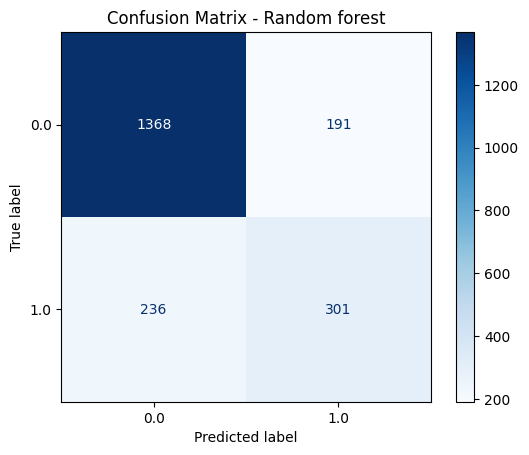

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py", 

Adaboost classifier - Train Accuracy: 0.8502, Test Accuracy: 0.7929
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1559
         1.0       0.58      0.70      0.63       537

    accuracy                           0.79      2096
   macro avg       0.73      0.76      0.74      2096
weighted avg       0.81      0.79      0.80      2096




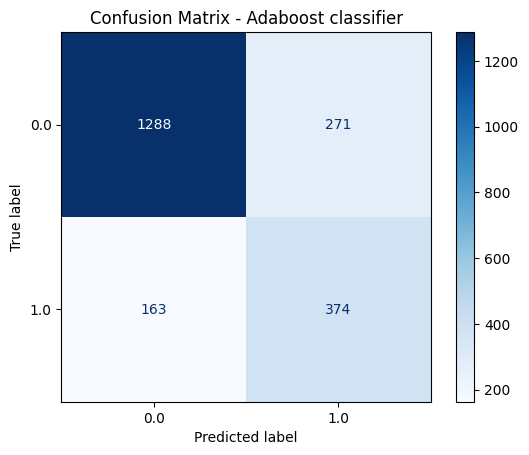

Evaluating Xgboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost classifier - Train Accuracy: 0.9167, Test Accuracy: 0.8030
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1559
         1.0       0.62      0.60      0.61       537

    accuracy                           0.80      2096
   macro avg       0.74      0.74      0.74      2096
weighted avg       0.80      0.80      0.80      2096




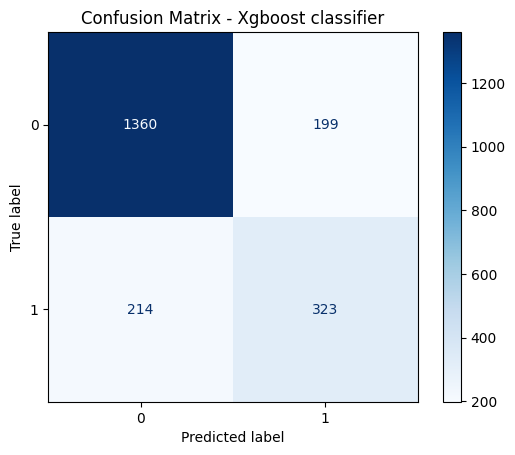

Evaluating Support vector classifier...
Support vector classifier - Train Accuracy: 0.8683, Test Accuracy: 0.7958
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1559
         1.0       0.60      0.59      0.60       537

    accuracy                           0.80      2096
   macro avg       0.73      0.73      0.73      2096
weighted avg       0.79      0.80      0.80      2096




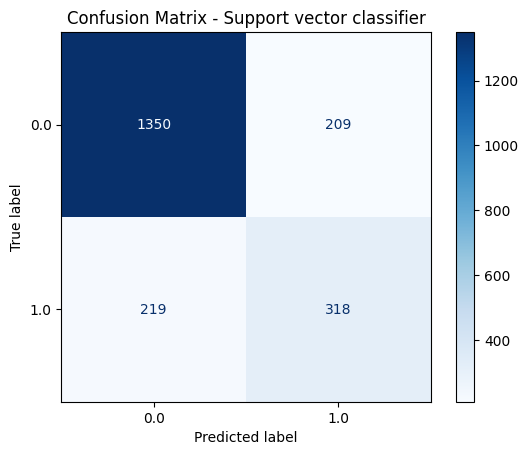


Best Model: Xgboost classifier
Final accuracy: 0.8030
Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1559
         1.0       0.62      0.60      0.61       537

    accuracy                           0.80      2096
   macro avg       0.74      0.74      0.74      2096
weighted avg       0.80      0.80      0.80      2096



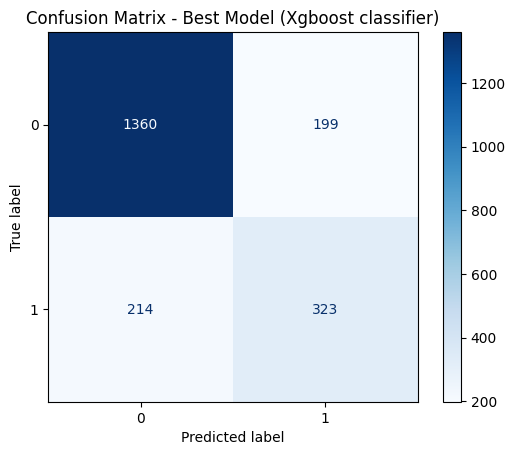

In [59]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Support vector classifier": SVC()
}

params = {
                "Logistic regression": [ {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cholesky']},
                                         {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'saga']},
                                         {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['saga'], 'l1_ratio': [0.5]} ],
                
                "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-07]},
                
                "Knn classifier": {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30, 40, 50],
                                   'weights': ['uniform', 'distance'],
                                   'algorithm': ['brute', 'kd_tree', 'ball_tree']},
                
                "Decision tree": {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2']},
                
                "Random forest": {'n_estimators': [50, 100, 150, 200],
                                  'criterion': ['gini', 'entropy', 'log_loss'],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2'],
                                  'class_weight': ['balanced']},
                
                "Adaboost classifier": {'estimator': [None, LogisticRegression(), KNeighborsClassifier()],
                                        'n_estimators': [10, 50, 100, 200, 300, 400],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0] },
                                               
                "Xgboost classifier": {'n_estimators': [50, 100, 200],
                                       'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.6, 1.0],
                                       'max_depth': [3, 5, 7, 10],
                                       'sub_sample': [0.6, 0.8, 1.0],
                                       'colsample_bytree': [0.6, 0.8, 1.0]},
                
                #"Catboost classifier": {'iterations': [500],
                                        #'n_estimators': [100, 200, 300, 400],
                                        #'depth': [4, 6, 8, 10],
                                        #'learning_rate': [0.001, 0.05, 0.1],
                                        #'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        #'bagging_temperature': [0, 0.5, 1],
                                        #'random_strength': [0, 0.5, 1, 1.5, 2]},
                                                                            
                
                "Support vector classifier": {'C': [0.1, 1, 10, 100],
                                              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                              'gamma': ['scale', 'auto']}   }

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train, y_train=y_train,
                               X_test=X_test, y_test=y_test,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

In [61]:
y_train_s = pd.Series(y_train)
y_test_s = pd.Series(y_test)

In [62]:
y_train_s.value_counts()

1.0    3558
0.0    3557
Name: count, dtype: int64

In [63]:
y_test_s.value_counts()

0.0    1559
1.0     537
Name: count, dtype: int64

In [65]:
y_train_s.shape

(7115,)

In [66]:
y_test_s.shape

(2096,)

In [67]:
X_train.shape

(7115, 51)

In [68]:
X_test.shape

(2096, 51)

In [69]:
from imblearn.under_sampling import EditedNearestNeighbours

In [55]:
num_cols = ['MonthlyCharges', 'TotalCharges']
            
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
            
num_pipeline = Pipeline(steps = [('scaler1', MinMaxScaler() ),
                                 ('scaler2', StandardScaler() ),
                                 ('scaler3', Normalizer() )])
            
cat_pipeline = Pipeline(steps = [('encoder', OneHotEncoder() )])
            
            
preprocessor = ColumnTransformer([('num_pipeline', num_pipeline, num_cols),
                                  ('cat_pipeline', cat_pipeline, cat_cols)])

# smoteenn

In [92]:
target_column_name = 'Churn'
num_cols = ['MonthlyCharges', 'TotalCharges']
            
            
            
# train set
X_train = train_df.drop(columns=target_column_name, axis=1)
y_train = train_df[target_column_name]
            
# test set
X_test = test_df.drop(columns=target_column_name, axis=1)
y_test = test_df[target_column_name]
            
    
            
#logging.info("Preprocessing train and test sets has been started.")
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)
            
            
            
# handling imbalance 
#logging.info("Handling imbalance.")
smote_enn = SMOTEENN(random_state=42)
smote = SMOTE(sampling_strategy='all', k_neighbors=3)
#enn = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3)
#kmeans_smote = KMeansSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=6)
smote_ = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=7)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_arr, y_train)
            
            
            #X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
            #y_train_df = pd.DataFrame(y_train_resampled, columns=y_train.columns)
            
            
            #logging.info(f"Shape of X_train before SMOTEENN:{X_train_arr.shape}")
            #logging.info(f"Shape of X_train after SMOTEENN: {X_train_resampled.shape}")
            #logging.info(f"Shape of y_train before SMOTEEN: {y_train.shape}")
            #logging.info(f"Shape of y_train after SMOTEENN: {y_train_resampled.shape}")
            
            #logging.info(f"Distribution of Churn before SMOTEENN: {y_train.value_counts()}")
            #logging.info(f"Distribution of Churn after SMOTEENN: {y_train_resampled.value_counts()}")
            
            #logging.info("Imbalance has been handled.")


        
 # concatenate the transformed train & test_arr to a single numpy array 
# np.c_ function to concatenate column wise                                                                               
train_arr1 = np.c_[X_train_resampled, y_train_resampled]
test_arr1 = np.c_[X_test_arr, np.array(y_test)]
            
            
            
            # saving the preprocessing object 
            #save_object(file_path = self.data_transformation_config.preprocessor_obj_file_path,
                        #obj = preprocessing_obj)
            
            

            #logging.info("Preprocessing object has been saved.")
            #logging.info("Data transformation process has been completed.")
            
            #return(train_arr, 
                   #test_arr,
                   #self.data_transformation_config.preprocessor_obj_file_path)

In [93]:
X_train1, X_test1, y_train1, y_test1 = (train_arr1[:, :-1], test_arr1[:, :-1],
                                    train_arr1[:, -1], test_arr1[:, -1])

In [94]:
X_train_arr.shape

(4888, 51)

In [100]:
X_test.shape

(2096, 19)

In [95]:
y_train.shape

(4888,)

In [96]:
y_train.value_counts()

Churn
0    3557
1    1331
Name: count, dtype: int64

In [101]:
y_test.value_counts()

Churn
0    1559
1     537
Name: count, dtype: int64

In [97]:
X_train1.shape

(4185, 51)

In [98]:
X_test1.shape

(2096, 51)

In [99]:
y_train1.shape

(4185,)

In [88]:
y_test1.shape

(2096,)

In [89]:
y_train_ser1 = pd.Series(y_train1)
y_test_ser1 = pd.Series(y_test1)

In [90]:
print(y_train_ser2.value_counts())
print(y_test_ser2.value_counts())

0.0    3557
1.0    3557
Name: count, dtype: int64
0.0    1559
1.0     537
Name: count, dtype: int64


Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.9245, Test Accuracy: 0.6799
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.60      0.74      1559
         1.0       0.44      0.90      0.59       537

    accuracy                           0.68      2096
   macro avg       0.69      0.75      0.66      2096
weighted avg       0.82      0.68      0.70      2096




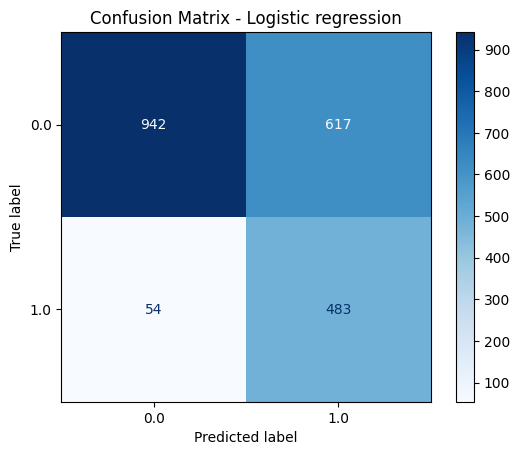

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.9020, Test Accuracy: 0.6904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75      1559
         1.0       0.45      0.88      0.59       537

    accuracy                           0.69      2096
   macro avg       0.69      0.75      0.67      2096
weighted avg       0.81      0.69      0.71      2096




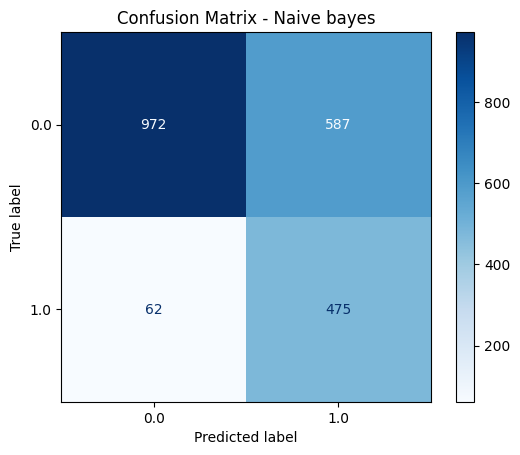

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 1.0000, Test Accuracy: 0.6345
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.54      0.69      1559
         1.0       0.40      0.91      0.56       537

    accuracy                           0.63      2096
   macro avg       0.67      0.72      0.62      2096
weighted avg       0.81      0.63      0.65      2096




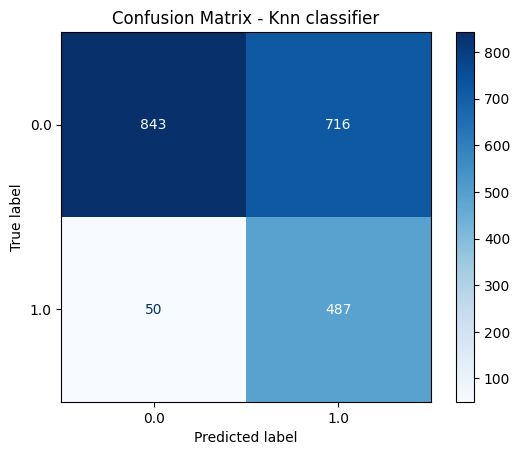

Evaluating Decision tree...
Decision tree - Train Accuracy: 1.0000, Test Accuracy: 0.7071
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77      1559
         1.0       0.46      0.81      0.59       537

    accuracy                           0.71      2096
   macro avg       0.68      0.74      0.68      2096
weighted avg       0.79      0.71      0.73      2096




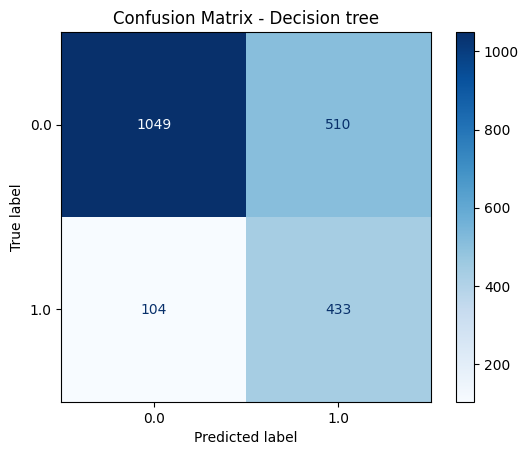

Evaluating Random forest...
Random forest - Train Accuracy: 1.0000, Test Accuracy: 0.7114
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.77      1559
         1.0       0.47      0.87      0.61       537

    accuracy                           0.71      2096
   macro avg       0.70      0.76      0.69      2096
weighted avg       0.82      0.71      0.73      2096




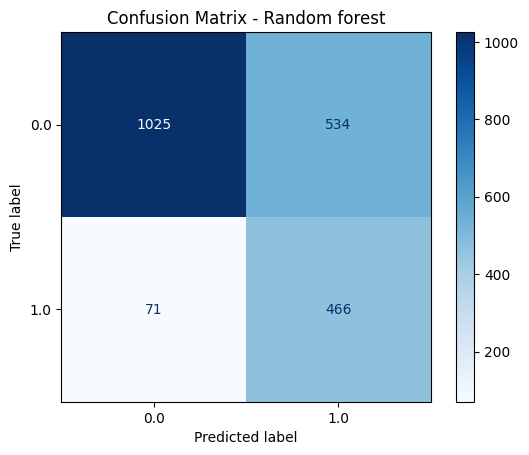

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py", 

Adaboost classifier - Train Accuracy: 0.9642, Test Accuracy: 0.7161
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78      1559
         1.0       0.47      0.89      0.62       537

    accuracy                           0.72      2096
   macro avg       0.71      0.77      0.70      2096
weighted avg       0.82      0.72      0.73      2096




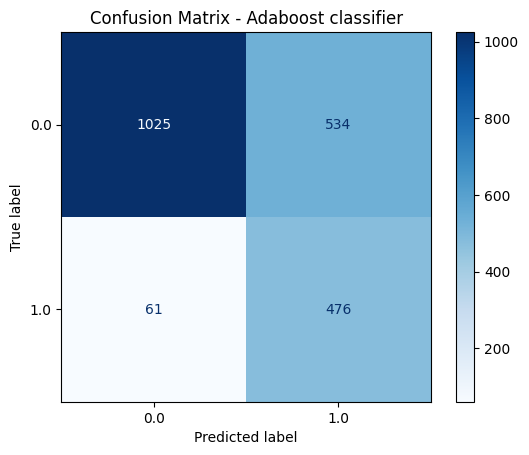

Evaluating Xgboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost classifier - Train Accuracy: 0.9995, Test Accuracy: 0.7042
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77      1559
         1.0       0.46      0.86      0.60       537

    accuracy                           0.70      2096
   macro avg       0.69      0.75      0.68      2096
weighted avg       0.81      0.70      0.72      2096




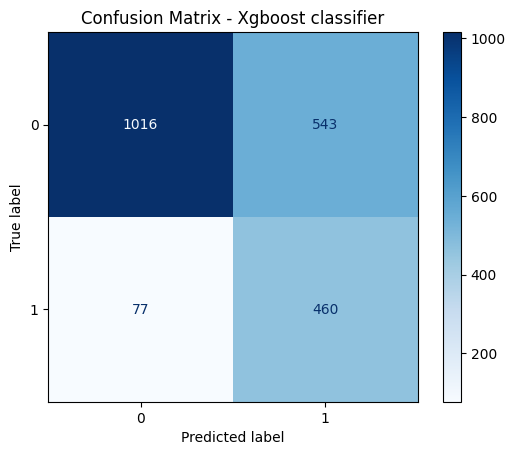

Evaluating Support vector classifier...
Support vector classifier - Train Accuracy: 0.9931, Test Accuracy: 0.6966
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76      1559
         1.0       0.45      0.85      0.59       537

    accuracy                           0.70      2096
   macro avg       0.69      0.75      0.67      2096
weighted avg       0.80      0.70      0.72      2096




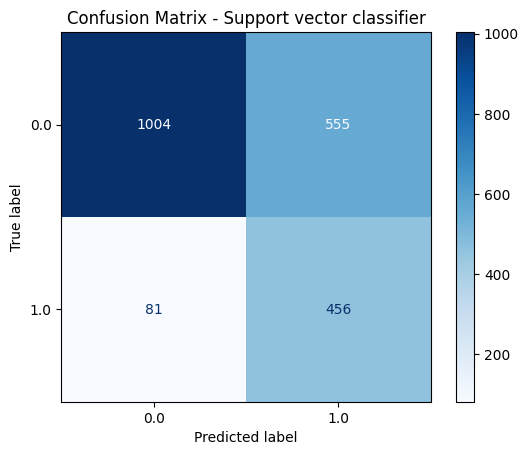


Best Model: Adaboost classifier
Final accuracy: 0.7161
Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78      1559
         1.0       0.47      0.89      0.62       537

    accuracy                           0.72      2096
   macro avg       0.71      0.77      0.70      2096
weighted avg       0.82      0.72      0.73      2096



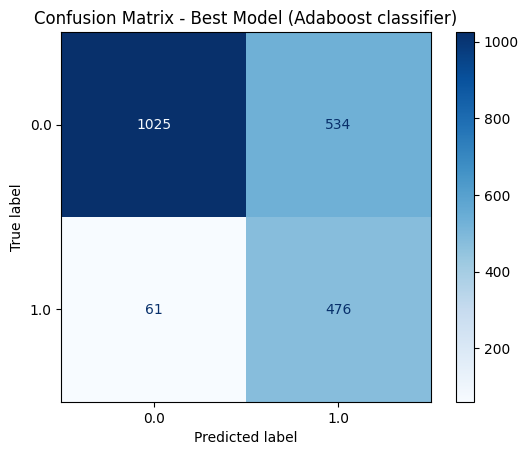

In [102]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Support vector classifier": SVC()
}

params = {
                "Logistic regression": [ {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cholesky']},
                                         {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'saga']},
                                         {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['saga'], 'l1_ratio': [0.5]} ],
                
                "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-07]},
                
                "Knn classifier": {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30, 40, 50],
                                   'weights': ['uniform', 'distance'],
                                   'algorithm': ['brute', 'kd_tree', 'ball_tree']},
                
                "Decision tree": {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2']},
                
                "Random forest": {'n_estimators': [50, 100, 150, 200],
                                  'criterion': ['gini', 'entropy', 'log_loss'],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2'],
                                  'class_weight': ['balanced']},
                
                "Adaboost classifier": {'estimator': [None, LogisticRegression(), KNeighborsClassifier()],
                                        'n_estimators': [10, 50, 100, 200, 300, 400],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0] },
                                               
                "Xgboost classifier": {'n_estimators': [50, 100, 200],
                                       'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.6, 1.0],
                                       'max_depth': [3, 5, 7, 10],
                                       'sub_sample': [0.6, 0.8, 1.0],
                                       'colsample_bytree': [0.6, 0.8, 1.0]},
                
                #"Catboost classifier": {'iterations': [500],
                                        #'n_estimators': [100, 200, 300, 400],
                                        #'depth': [4, 6, 8, 10],
                                        #'learning_rate': [0.001, 0.05, 0.1],
                                        #'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        #'bagging_temperature': [0, 0.5, 1],
                                        #'random_strength': [0, 0.5, 1, 1.5, 2]},
                                                                            
                
                "Support vector classifier": {'C': [0.1, 1, 10, 100],
                                              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                              'gamma': ['scale', 'auto']}   }

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train1, y_train=y_train1,
                               X_test=X_test1, y_test=y_test1,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

## smote 

In [112]:
target_column_name = 'Churn'
num_cols = ['MonthlyCharges', 'TotalCharges']
            
            
            
# train set
X_train = train_df.drop(columns=target_column_name, axis=1)
y_train = train_df[target_column_name]
            
# test set
X_test = test_df.drop(columns=target_column_name, axis=1)
y_test = test_df[target_column_name]
            
    
            
#logging.info("Preprocessing train and test sets has been started.")
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)
            
            
            
# handling imbalance 
#logging.info("Handling imbalance.")
#smote_enn = SMOTEENN(random_state=42)
#smote = SMOTE(sampling_strategy='all', k_neighbors=3)
#enn = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3)
#kmeans_smote = KMeansSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=6)
smote_ = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote_.fit_resample(X_train_arr, y_train)
            
            
            #X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
            #y_train_df = pd.DataFrame(y_train_resampled, columns=y_train.columns)
            
            
            #logging.info(f"Shape of X_train before SMOTEENN:{X_train_arr.shape}")
            #logging.info(f"Shape of X_train after SMOTEENN: {X_train_resampled.shape}")
            #logging.info(f"Shape of y_train before SMOTEEN: {y_train.shape}")
            #logging.info(f"Shape of y_train after SMOTEENN: {y_train_resampled.shape}")
            
            #logging.info(f"Distribution of Churn before SMOTEENN: {y_train.value_counts()}")
            #logging.info(f"Distribution of Churn after SMOTEENN: {y_train_resampled.value_counts()}")
            
            #logging.info("Imbalance has been handled.")


        
 # concatenate the transformed train & test_arr to a single numpy array 
# np.c_ function to concatenate column wise                                                                               
train_arr2 = np.c_[X_train_resampled, y_train_resampled]
test_arr2 = np.c_[X_test_arr, np.array(y_test)]
            
            
            
            # saving the preprocessing object 
            #save_object(file_path = self.data_transformation_config.preprocessor_obj_file_path,
                        #obj = preprocessing_obj)
            
            

            #logging.info("Preprocessing object has been saved.")
            #logging.info("Data transformation process has been completed.")
            
            #return(train_arr, 
                   #test_arr,
                   #self.data_transformation_config.preprocessor_obj_file_path)

In [113]:
X_train2, X_test2, y_train2, y_test2 = (train_arr2[:, :-1], test_arr2[:, :-1],
                                    train_arr2[:, -1], test_arr2[:, -1])

In [114]:
X_train2.shape

(7114, 51)

In [115]:
X_test2.shape

(2096, 51)

In [116]:
y_train2.shape

(7114,)

In [117]:
y_test2.shape

(2096,)

In [118]:
y_train_ser2 = pd.Series(y_train2)
y_test_ser2 = pd.Series(y_test2)

In [119]:
print(y_train_ser2.value_counts())
print(y_test_ser2.value_counts())

0.0    3557
1.0    3557
Name: count, dtype: int64
0.0    1559
1.0     537
Name: count, dtype: int64


Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.7671, Test Accuracy: 0.7653
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83      1559
         1.0       0.53      0.81      0.64       537

    accuracy                           0.77      2096
   macro avg       0.72      0.78      0.73      2096
weighted avg       0.82      0.77      0.78      2096




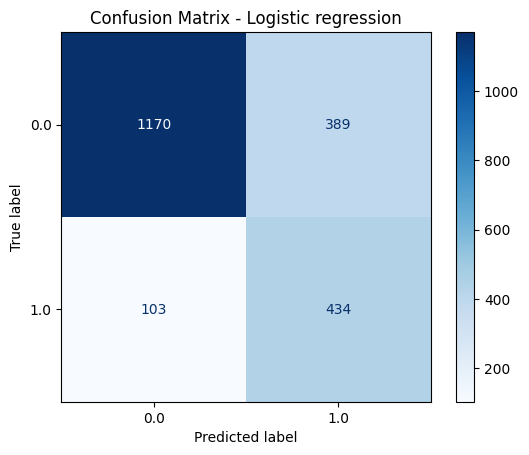

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.7464, Test Accuracy: 0.7247
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79      1559
         1.0       0.48      0.85      0.61       537

    accuracy                           0.72      2096
   macro avg       0.70      0.77      0.70      2096
weighted avg       0.81      0.72      0.74      2096




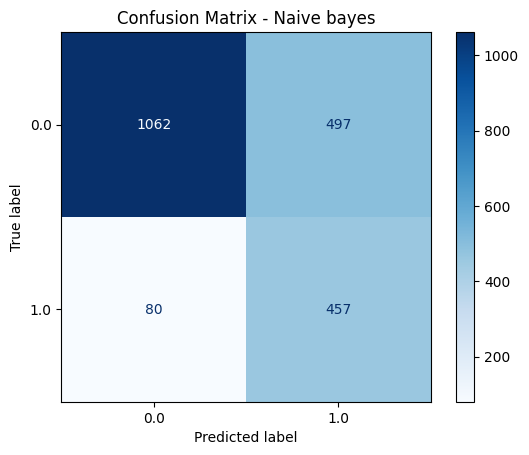

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 0.9990, Test Accuracy: 0.6947
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      1559
         1.0       0.44      0.67      0.53       537

    accuracy                           0.69      2096
   macro avg       0.65      0.69      0.65      2096
weighted avg       0.75      0.69      0.71      2096




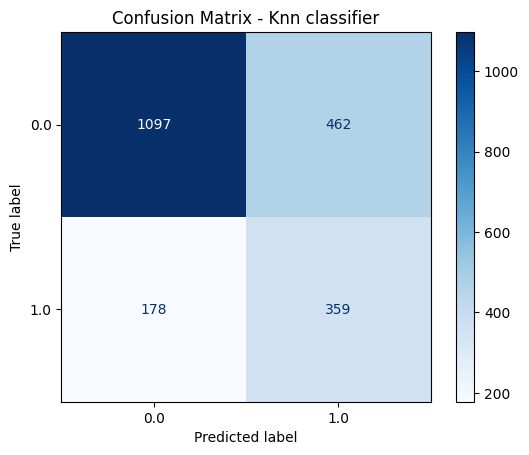

Evaluating Decision tree...
Decision tree - Train Accuracy: 0.9116, Test Accuracy: 0.7300
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      1559
         1.0       0.48      0.65      0.55       537

    accuracy                           0.73      2096
   macro avg       0.67      0.70      0.68      2096
weighted avg       0.76      0.73      0.74      2096




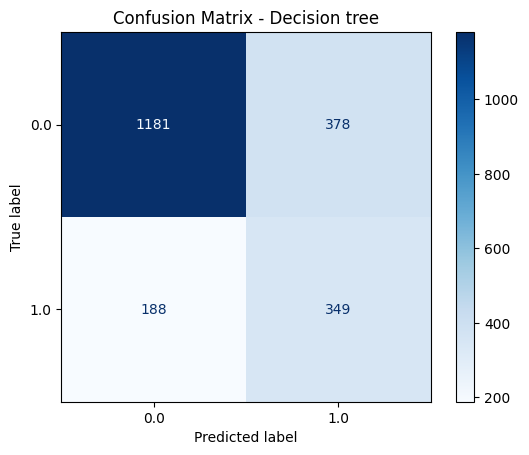

Evaluating Random forest...
Random forest - Train Accuracy: 0.9986, Test Accuracy: 0.7839
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1559
         1.0       0.58      0.56      0.57       537

    accuracy                           0.78      2096
   macro avg       0.72      0.71      0.71      2096
weighted avg       0.78      0.78      0.78      2096




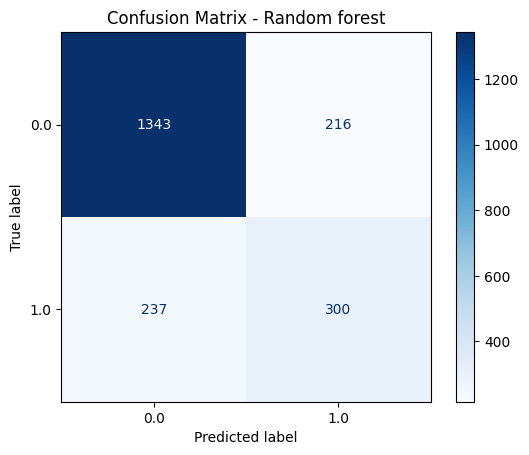

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py", 

Adaboost classifier - Train Accuracy: 0.8487, Test Accuracy: 0.7848
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1559
         1.0       0.56      0.72      0.63       537

    accuracy                           0.78      2096
   macro avg       0.73      0.76      0.74      2096
weighted avg       0.81      0.78      0.79      2096




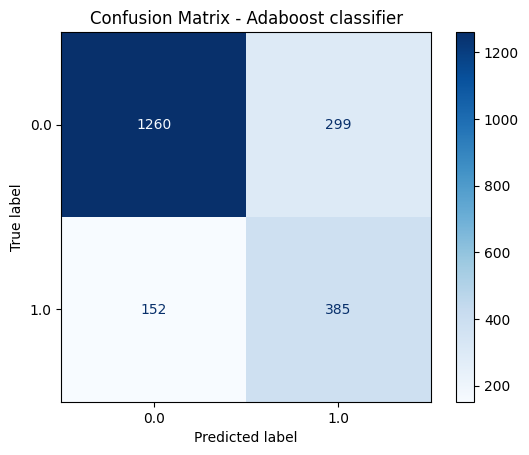

Evaluating Xgboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost classifier - Train Accuracy: 0.9708, Test Accuracy: 0.7820
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1559
         1.0       0.57      0.61      0.59       537

    accuracy                           0.78      2096
   macro avg       0.72      0.73      0.72      2096
weighted avg       0.79      0.78      0.78      2096




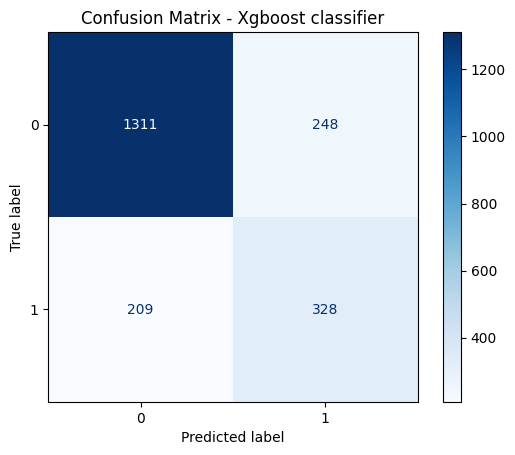

Evaluating Support vector classifier...
Support vector classifier - Train Accuracy: 0.9120, Test Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1559
         1.0       0.51      0.68      0.58       537

    accuracy                           0.75      2096
   macro avg       0.69      0.73      0.70      2096
weighted avg       0.78      0.75      0.76      2096




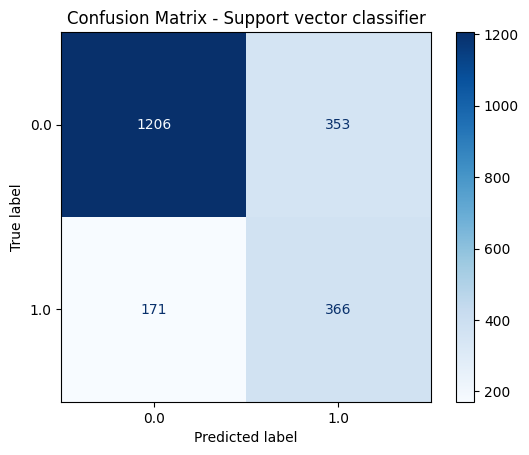


Best Model: Adaboost classifier
Final accuracy: 0.7848
Best Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1559
         1.0       0.56      0.72      0.63       537

    accuracy                           0.78      2096
   macro avg       0.73      0.76      0.74      2096
weighted avg       0.81      0.78      0.79      2096



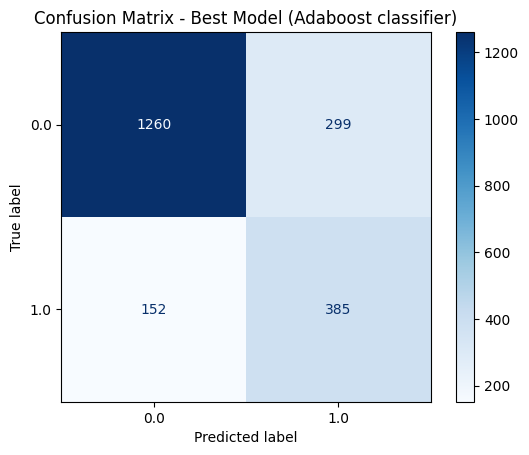

In [120]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Support vector classifier": SVC()
}

params = {
                "Logistic regression": [ {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cholesky']},
                                         {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'saga']},
                                         {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['saga'], 'l1_ratio': [0.5]} ],
                
                "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-07]},
                
                "Knn classifier": {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30, 40, 50],
                                   'weights': ['uniform', 'distance'],
                                   'algorithm': ['brute', 'kd_tree', 'ball_tree']},
                
                "Decision tree": {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2']},
                
                "Random forest": {'n_estimators': [50, 100, 150, 200],
                                  'criterion': ['gini', 'entropy', 'log_loss'],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2'],
                                  'class_weight': ['balanced']},
                
                "Adaboost classifier": {'estimator': [None, LogisticRegression(), KNeighborsClassifier()],
                                        'n_estimators': [10, 50, 100, 200, 300, 400],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0] },
                                               
                "Xgboost classifier": {'n_estimators': [50, 100, 200],
                                       'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.6, 1.0],
                                       'max_depth': [3, 5, 7, 10],
                                       'sub_sample': [0.6, 0.8, 1.0],
                                       'colsample_bytree': [0.6, 0.8, 1.0]},
                
                #"Catboost classifier": {'iterations': [500],
                                        #'n_estimators': [100, 200, 300, 400],
                                        #'depth': [4, 6, 8, 10],
                                        #'learning_rate': [0.001, 0.05, 0.1],
                                        #'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        #'bagging_temperature': [0, 0.5, 1],
                                        #'random_strength': [0, 0.5, 1, 1.5, 2]},
                                                                            
                
                "Support vector classifier": {'C': [0.1, 1, 10, 100],
                                              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                              'gamma': ['scale', 'auto']}   }

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train2, y_train=y_train2,
                               X_test=X_test2, y_test=y_test2,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

## kmeanssmote

In [121]:
target_column_name = 'Churn'
num_cols = ['MonthlyCharges', 'TotalCharges']
            
            
            
# train set
X_train = train_df.drop(columns=target_column_name, axis=1)
y_train = train_df[target_column_name]
            
# test set
X_test = test_df.drop(columns=target_column_name, axis=1)
y_test = test_df[target_column_name]
            
    
            
#logging.info("Preprocessing train and test sets has been started.")
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)
            
            
            
# handling imbalance 
#logging.info("Handling imbalance.")
#smote_enn = SMOTEENN(random_state=42)
#smote = SMOTE(sampling_strategy='all', k_neighbors=3)
#enn = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3)
kmeans_smote = KMeansSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=2)
#smote_ = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=7)
X_train_resampled, y_train_resampled = kmeans_smote.fit_resample(X_train_arr, y_train)
            
            
            #X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
            #y_train_df = pd.DataFrame(y_train_resampled, columns=y_train.columns)
            
            
            #logging.info(f"Shape of X_train before SMOTEENN:{X_train_arr.shape}")
            #logging.info(f"Shape of X_train after SMOTEENN: {X_train_resampled.shape}")
            #logging.info(f"Shape of y_train before SMOTEEN: {y_train.shape}")
            #logging.info(f"Shape of y_train after SMOTEENN: {y_train_resampled.shape}")
            
            #logging.info(f"Distribution of Churn before SMOTEENN: {y_train.value_counts()}")
            #logging.info(f"Distribution of Churn after SMOTEENN: {y_train_resampled.value_counts()}")
            
            #logging.info("Imbalance has been handled.")


        
 # concatenate the transformed train & test_arr to a single numpy array 
# np.c_ function to concatenate column wise                                                                               
train_arr3 = np.c_[X_train_resampled, y_train_resampled]
test_arr3 = np.c_[X_test_arr, np.array(y_test)]
            
            
            
            # saving the preprocessing object 
            #save_object(file_path = self.data_transformation_config.preprocessor_obj_file_path,
                        #obj = preprocessing_obj)
            
            

            #logging.info("Preprocessing object has been saved.")
            #logging.info("Data transformation process has been completed.")
            
            #return(train_arr, 
                   #test_arr,
                   #self.data_transformation_config.preprocessor_obj_file_path)

In [122]:
X_train3, X_test3, y_train3, y_test3 = (train_arr3[:, :-1], test_arr3[:, :-1],
                                    train_arr3[:, -1], test_arr3[:, -1])

In [123]:
X_train3.shape

(7115, 51)

In [124]:
X_test3.shape

(2096, 51)

In [125]:
y_train_ser3 = pd.Series(y_train3)
y_test_ser3 = pd.Series(y_test3)

In [127]:
print(y_train_ser3.value_counts())
print(y_test_ser3.value_counts())

1.0    3558
0.0    3557
Name: count, dtype: int64
0.0    1559
1.0     537
Name: count, dtype: int64


Model training has been started.
Evaluating Logistic regression...
Logistic regression - Train Accuracy: 0.8439, Test Accuracy: 0.7958
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1559
         1.0       0.59      0.68      0.63       537

    accuracy                           0.80      2096
   macro avg       0.74      0.76      0.74      2096
weighted avg       0.81      0.80      0.80      2096




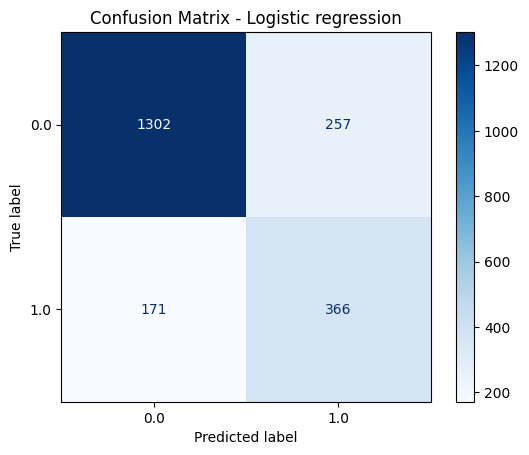

Evaluating Naive bayes...
Naive bayes - Train Accuracy: 0.8108, Test Accuracy: 0.7462
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1559
         1.0       0.50      0.82      0.62       537

    accuracy                           0.75      2096
   macro avg       0.71      0.77      0.72      2096
weighted avg       0.81      0.75      0.76      2096




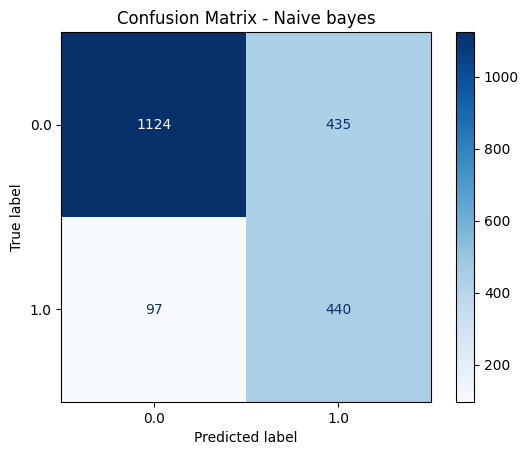

Evaluating Knn classifier...
Knn classifier - Train Accuracy: 0.8572, Test Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1559
         1.0       0.53      0.72      0.61       537

    accuracy                           0.77      2096
   macro avg       0.71      0.75      0.72      2096
weighted avg       0.80      0.77      0.78      2096




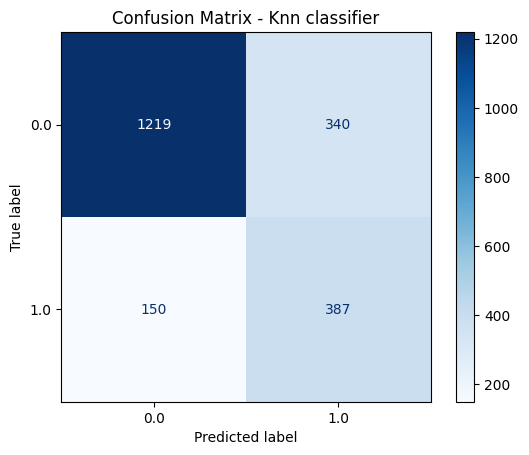

Evaluating Decision tree...
Decision tree - Train Accuracy: 0.8715, Test Accuracy: 0.7691
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1559
         1.0       0.54      0.62      0.58       537

    accuracy                           0.77      2096
   macro avg       0.70      0.72      0.71      2096
weighted avg       0.78      0.77      0.77      2096




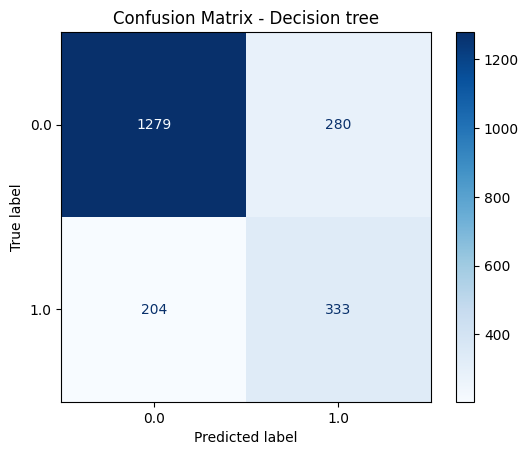

Evaluating Random forest...
Random forest - Train Accuracy: 0.9271, Test Accuracy: 0.8025
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1559
         1.0       0.62      0.58      0.60       537

    accuracy                           0.80      2096
   macro avg       0.74      0.73      0.73      2096
weighted avg       0.80      0.80      0.80      2096




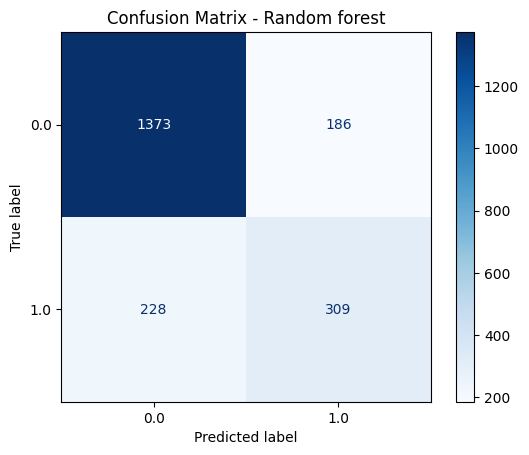

Evaluating Adaboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
168 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\sklearn\ensemble\_weight_boosting.py", 

Adaboost classifier - Train Accuracy: 0.8599, Test Accuracy: 0.8001
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1559
         1.0       0.60      0.65      0.62       537

    accuracy                           0.80      2096
   macro avg       0.74      0.75      0.74      2096
weighted avg       0.81      0.80      0.80      2096




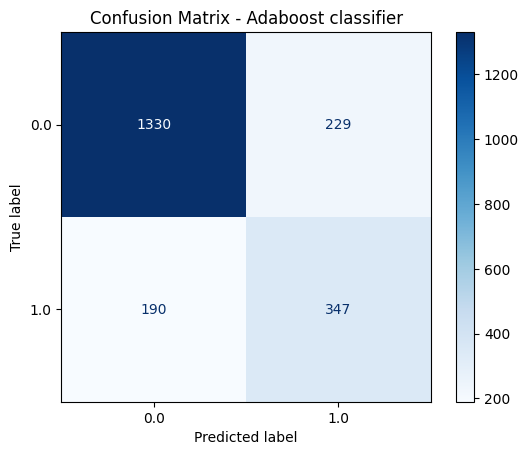

Evaluating Xgboost classifier...


F:\Data Science\Customer-Churn-Project\envi\lib\site-packages\xgboost\core.py:158: UserWarning: [14:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost classifier - Train Accuracy: 0.9261, Test Accuracy: 0.8010
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1559
         1.0       0.61      0.61      0.61       537

    accuracy                           0.80      2096
   macro avg       0.74      0.74      0.74      2096
weighted avg       0.80      0.80      0.80      2096




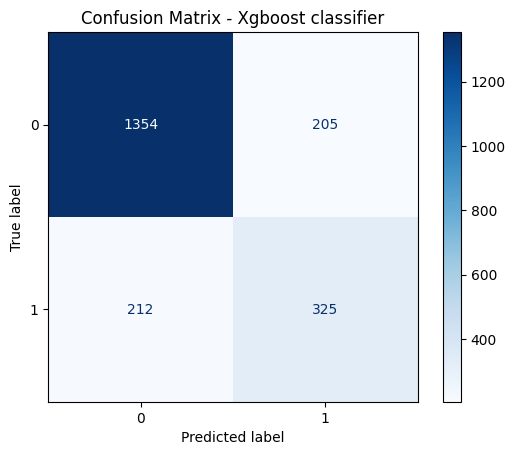

Evaluating Catboost classifier...


CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.

In [130]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=7, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    "Logistic regression": LogisticRegression(),
    "Naive bayes": GaussianNB(),
    "Knn classifier": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Adaboost classifier": AdaBoostClassifier(),
    "Xgboost classifier": XGBClassifier(),
    "Catboost classifier": CatBoostClassifier(),
    #"Support vector classifier": SVC()
}

params = {
                "Logistic regression": [ {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cholesky']},
                                         {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['liblinear', 'saga']},
                                         {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          'solver': ['saga'], 'l1_ratio': [0.5]} ],
                
                "Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-07]},
                
                "Knn classifier": {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30, 40, 50],
                                   'weights': ['uniform', 'distance'],
                                   'algorithm': ['brute', 'kd_tree', 'ball_tree']},
                
                "Decision tree": {'criterion': ['gini', 'entropy', 'log_loss'],
                                  'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2']},
                
                "Random forest": {'n_estimators': [50, 100, 150, 200],
                                  'criterion': ['gini', 'entropy', 'log_loss'],
                                  'min_samples_split': [2, 5, 10],
                                  'min_samples_leaf': [1, 2, 4],
                                  'max_features': [None, 'sqrt', 'log2'],
                                  'class_weight': ['balanced']},
                
                "Adaboost classifier": {'estimator': [None, LogisticRegression()],
                                        'n_estimators': [10, 50, 100, 200, 300, 400],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0] },
                                               
                "Xgboost classifier": {'n_estimators': [50, 100, 200],
                                       'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.6, 1.0],
                                       'max_depth': [3, 5, 7, 10],
                                       'sub_sample': [0.6, 0.8, 1.0],
                                       'colsample_bytree': [0.6, 0.8, 1.0]},
                
                "Catboost classifier": {#'iterations': [500],
                                        'n_estimators': [100, 200, 300, 400],
                                        'depth': [4, 6, 8, 10],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'bagging_temperature': [0, 0.5, 1],
                                        'random_strength': [0, 0.5, 1, 1.5, 2]},
                                                                            
                
                #"Support vector classifier": {'C': [0.1, 1, 10, 100],
                                              #'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                              #'gamma': ['scale', 'auto']}   
}

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train3, y_train=y_train3,
                               X_test=X_test3, y_test=y_test3,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

In [131]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the evaluate_models function
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = {}
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        
        grid_search = GridSearchCV(model, params[model_name], cv=7, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        
        # Train predictions and accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test predictions and accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_test_pred)
        
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        
        model_report[model_name] = {
            'model': best_model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': class_report,
            'confusion_matrix': cm
        }
        
        print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print(f"Classification Report:\n{class_report}\n")
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
    
    return model_report

# ... [rest of the code remains the same] ...
# Define models and parameters
models = {
    #"Logistic regression": LogisticRegression(),
    #"Naive bayes": GaussianNB(),
    #"Knn classifier": KNeighborsClassifier(),
    #"Decision tree": DecisionTreeClassifier(),
    #"Random forest": RandomForestClassifier(),
    #"Adaboost classifier": AdaBoostClassifier(),
    #"Xgboost classifier": XGBClassifier(),
    "Catboost classifier": CatBoostClassifier(),
    #"Support vector classifier": SVC()
}

params = {
                #"Logistic regression": [ {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                         # #'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cholesky']},
                                         #{'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          #'solver': ['liblinear', 'saga']},
                                         #{'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100, 300],
                                          #'solver': ['saga'], 'l1_ratio': [0.5]} ],
                
                #"Naive bayes": {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-07]},
                
                #"Knn classifier": {'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25, 30, 40, 50],
                                   #'weights': ['uniform', 'distance'],
                                   #'algorithm': ['brute', 'kd_tree', 'ball_tree']},
                
                #"Decision tree": {'criterion': ['gini', 'entropy', 'log_loss'],
                                  #'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50],
                                  #'min_samples_split': [2, 5, 10],
                                  #'min_samples_leaf': [1, 2, 4],
                                  #'max_features': [None, 'sqrt', 'log2']},
                
                #"Random forest": {'n_estimators': [50, 100, 150, 200],
                                  #'criterion': ['gini', 'entropy', 'log_loss'],
                                  #'min_samples_split': [2, 5, 10],
                                  #'min_samples_leaf': [1, 2, 4],
                                  #'max_features': [None, 'sqrt', 'log2'],
                                  #'class_weight': ['balanced']},
                
                #"Adaboost classifier": {'estimator': [None, LogisticRegression()],
                                        #'n_estimators': [10, 50, 100, 200, 300, 400],
                                        #'learning_rate': [0.01, 0.1, 0.5, 1.0] },
                                               
                #"Xgboost classifier": {'n_estimators': [50, 100, 200],
                                      # 'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.6, 1.0],
                                      # 'max_depth': [3, 5, 7, 10],
                                      # 'sub_sample': [0.6, 0.8, 1.0],
                                      # 'colsample_bytree': [0.6, 0.8, 1.0]},
                
                "Catboost classifier": {#'iterations': [500],
                                        'n_estimators': [100, 200, 300, 400],
                                        'depth': [4, 6, 8, 10],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'bagging_temperature': [0, 0.5, 1],
                                        'random_strength': [0, 0.5, 1, 1.5, 2]},
                                                                            
                
                #"Support vector classifier": {'C': [0.1, 1, 10, 100],
                                              #'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                                              #'gamma': ['scale', 'auto']}   
}

# Evaluate models
print("Model training has been started.")
model_report = evaluate_models(X_train=X_train3, y_train=y_train3,
                               X_test=X_test3, y_test=y_test3,
                               models=models,
                               params=params)

# Print detailed model report
#print("\nDetailed Model Report:")
#for model_name, results in model_report.items():
    #print(f"{model_name}:")
    #print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
    #print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    #print(f"  Classification Report:\n{results['classification_report']}")
    #print(f"  Confusion Matrix:\n{results['confusion_matrix']}\n")
    
    # Plot confusion matrix again for the detailed report
    #disp = ConfusionMatrixDisplay(confusion_matrix=results['confusion_matrix'], 
                                  #display_labels=results['model'].classes_)
    #disp.plot(cmap='Blues', values_format='d')
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.show()

# Find and print best model
best_model_name = max(model_report, key=lambda x: model_report[x]['test_accuracy'])
best_model_score = model_report[best_model_name]['test_accuracy']
best_model = model_report[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Final accuracy: {best_model_score:.4f}")
print(f"Best Model Classification Report:\n{model_report[best_model_name]['classification_report']}")

# Plot confusion matrix for the best model
best_cm = model_report[best_model_name]['confusion_matrix']
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - Best Model ({best_model_name})')
plt.show()

# If you want to save the best model
# import joblib
# joblib.dump(best_model, 'best_model.pkl')

Model training has been started.
Evaluating Catboost classifier...


KeyboardInterrupt: 

# Undersampling